# Exploring Initial Datasets for Project
This notebook is for will importing key modules and beginning to explore data for final MS Project.

In [4]:
import numpy, matplotlib, pandas, geopandas, pandas, fiona

In [5]:
# load census designated places shapefile
cdps_raw = geopandas.read_file("C:/NewMapsPlus/Map698/us-communities-fire/data/cb_2020_us_place_500k.zip")

In [6]:
# inspect
type(cdps_raw)

geopandas.geodataframe.GeoDataFrame

In [7]:
# get file info
cdps_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32188 entries, 0 to 32187
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     32188 non-null  object  
 1   PLACEFP     32188 non-null  object  
 2   PLACENS     32188 non-null  object  
 3   AFFGEOID    32188 non-null  object  
 4   GEOID       32188 non-null  object  
 5   NAME        32188 non-null  object  
 6   NAMELSAD    32188 non-null  object  
 7   STUSPS      32188 non-null  object  
 8   STATE_NAME  32188 non-null  object  
 9   LSAD        32188 non-null  object  
 10  ALAND       32188 non-null  int64   
 11  AWATER      32188 non-null  int64   
 12  geometry    32188 non-null  geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 3.2+ MB


In [8]:
# determine coordinate reference system
cdps_raw.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
# write a geoJSON copy of the shapefile to disk
with open('data\cdps.json', 'w') as f:
          f.write(cdps_raw.to_json())

In [12]:
# read the data
cdps = geopandas.read_file('data/cdps.json')
cdps.head()

,id,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,NAMELSAD,PLACEFP,PLACENS,STATEFP,STATE_NAME,STUSPS,geometry
0,0,1600000US1228575,2728657,0,1228575,25,Hampton,Hampton city,28575,02403791,12,Florida,FL,"POLYGON ((-82.15433 29.86419, -82.14682 29.864..."
1,1,1600000US1200625,2731534,49685,1200625,43,Alford,Alford town,00625,02405131,12,Florida,FL,"POLYGON ((-85.40333 30.70450, -85.39543 30.704..."
2,2,1600000US1226050,442668,54824,1226050,43,Glen Ridge,Glen Ridge town,26050,02406576,12,Florida,FL,"POLYGON ((-80.08267 26.67634, -80.07902 26.676..."
3,3,1600000US1369000,276730651,12329738,1369000,25,Savannah,Savannah city,69000,02405429,13,Georgia,GA,"MULTIPOLYGON (((-81.23851 32.06725, -81.21279 ..."
4,4,1600000US1367284,105461127,3308483,1367284,25,Roswell,Roswell city,67284,02404651,13,Georgia,GA,"POLYGON ((-84.41903 34.06118, -84.41903 34.061..."


[(-140.0, -60.0), (30.0, 60.0)]

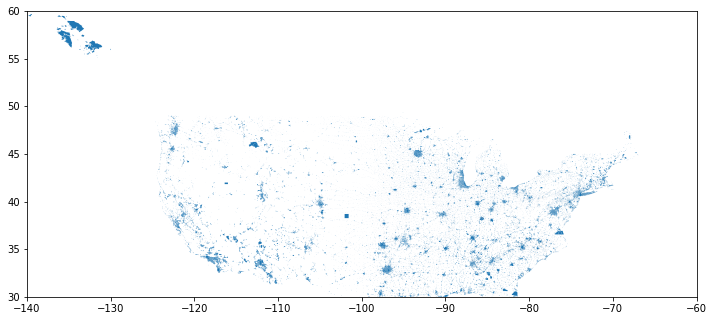

In [17]:
# basic plot of the data
ax = cdps.plot(figsize=(12,12));
ax.set(xlim=(-140,-60), ylim=(30, 60)) # scale the figure with axes values